In [1]:
import numpy as np
from scipy.stats import qmc
from qiskit_aer import Aer
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit import assemble
from qiskit_ibm_runtime import ( EstimatorV2 as Estimator , QiskitRuntimeService)
from qiskit.quantum_info import Pauli , SparsePauliOp
from qiskit.visualization import plot_histogram
from qiskit import ClassicalRegister , QuantumRegister
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.circuit import Parameter , QuantumCircuit


In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

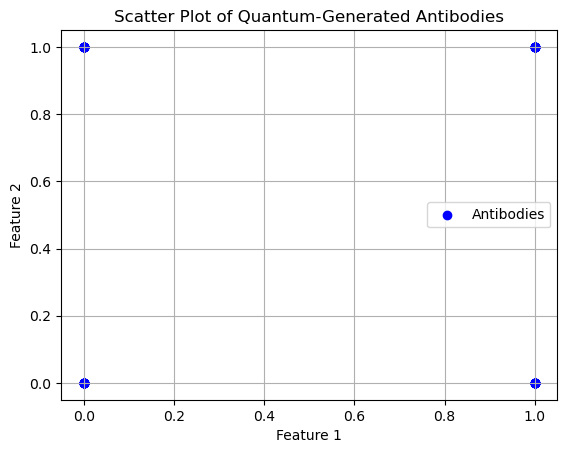

In [3]:
def quantum_antibodies (data_dim ,num_candidates):
    #Creating a quantum circuit
    qc = QuantumCircuit(data_dim , data_dim)
    #Applying hadmard gate to have the gates in the superposition
    qc.h(range(data_dim))
    #measuring the qubits
    qc.measure(range(data_dim) , range(data_dim))
    simulator = Aer.get_backend('qasm_simulator') #using Qasm simulator to simulate our program.
    transpiled_qc = transpile(qc, simulator)
    
    num_shots = num_candidates * 50  #we can increase the number of shots as per the requirement, they are the number of antibodies that are generated and can be seen in the graph.
    result = simulator.run(transpiled_qc, shots=num_shots).result()
    counts = result.get_counts()
        #Converting the set of antibodies generated by the quantum circuit to a bit string
    candidates = []
    for bitstring, count in counts.items():
        candidate = np.array([int(bit) for bit in bitstring])
        candidates.append(candidate)
    
    # Ensure the number of candidates is sufficient
    candidates_array = np.array(candidates)
    if len(candidates_array) < num_candidates:
        # Duplicate and truncate if not enough unique candidates
        while len(candidates_array) < num_candidates:
            candidates_array = np.vstack([candidates_array, candidates_array])
        candidates_array = candidates_array[:num_candidates]
    #adding noise see more point , we can also remove this to see only the points which are useful to use
    #noise = np.random.uniform(-0.1, 0.1, size=candidates_array.shape)
    #candidates_array = candidates_array + noise
    
    return candidates_array

def plot_antibodies(antibodies):
    # Plot the antibodies in a scatter plot
    if antibodies.shape[1] == 2:
        plt.scatter(antibodies[:, 0], antibodies[:, 1], c='blue', label='Antibodies')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('Scatter Plot of Quantum-Generated Antibodies')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print("Antibodies dimensionality must be 2 for plotting.")

#Calling the definition
data_dim = 2  # Dimensionality of the antibodies (e.g., 2D for visualization)
num_candidates = 50  # Number of quantum-generated candidates

# Generating the  quantum candidates
quantum_candidates = quantum_antibodies(data_dim, num_candidates)

# Plotting the generated antibodies
plot_antibodies(quantum_candidates)
    

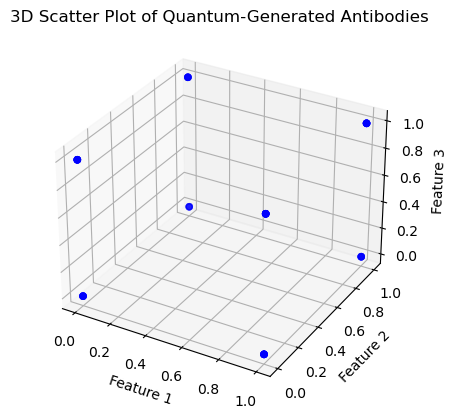

In [4]:
def plot_3d_antibodies(antibodies):
    # Plot the antibodies in a 3D scatter plot
    if antibodies.shape[1] == 3:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        
        ax.scatter(antibodies[:, 0], antibodies[:, 1], antibodies[:, 2], c='blue', marker='o')
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.set_zlabel('Feature 3')
        ax.set_title('3D Scatter Plot of Quantum-Generated Antibodies')
        
        plt.show()
    else:
        print("Antibodies dimensionality must be 3 for 3D plotting.")
data_dim = 3  # Dimensionality of the antibodies (3D for visualization)
num_candidates = 50  # Number of quantum-generated candidates

# Generate quantum candidates
quantum_candidates = quantum_antibodies(data_dim, num_candidates)

# Plot the generated antibodies
plot_3d_antibodies(quantum_candidates)

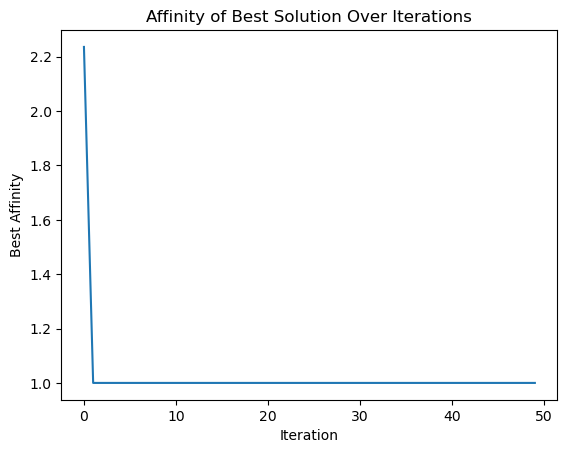

(array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
        1, 1, 0, 0, 0, 0]),
 1.0)

In [13]:
class clonalg:
    #Defining the parameters that we are going to use throughout  the code 
    def __init__(self, clonalfactor, mutation_rate, antigen, selection_size, replacement_size, num_iterations):
        self.clonalfactor = clonalfactor
        self.mutation_rate = mutation_rate
        self.antigen = antigen
        self.selection_size = selection_size
        self.replacement_size = replacement_size
        self.num_iterations = num_iterations
        self.affinity_history = []
        
#Calculating the affinity between the antibody and the antigen
#Note : for now we are putting the placeholder, look for different ways to calculate the afffinity between these two bodies , to make it more efficient.

    def affinity_cal(self , antibodies):
        return np.linalg.norm(antibodies - antigen, axis=1)
    def evaluation_affinity():
        return np.array([affinity_cal(ab, antigen) for ab in num_candidates])
#initializing the  population  of the antibodies    
    def initialize_population(self, population_size, sequence_length): #sequence length is used to make sure that the length of the antibody and antigen are same.
        return quantum_antibodies(sequence_length, population_size)

    def best_affinity(self, population, affinities):
        indices = np.argsort(affinities)[:self.selection_size]  # Select antibodies with lowest affinity (closest)
        return population[indices], affinities[indices]
    def clone_antibodies(self, selected_population): # selected population is population with the lowest affinity , which in this case is the best affinity.
        clones = []
        for antibody in selected_population:
            for _ in range(self.clonalfactor):
                clone = np.copy(antibody)
                clones.append(clone)
        return np.array(clones)

    def mutate(self, population):
        num_genes = population.shape[1]  # Number of genes in each antibody
        for i in range(len(population)):
            if np.random.rand() < self.mutation_rate:
                rotation_amount = np.random.randint(1, num_genes)  # Random rotation amount
                # Perform circular rotation
                population[i] = np.roll(population[i], shift=rotation_amount)
        return population

    def hill_climbing(self, solution):
        best_solution = np.copy(solution)
        best_affinity = self.affinity_cal(np.array([best_solution]))[0]
        num_genes = len(solution)
        
        for _ in range(self.num_iterations):
            neighbor = np.copy(best_solution)
            mutation_index = np.random.randint(num_genes)
            neighbor[mutation_index] = np.random.rand()
            
            current_affinity = self.affinity_cal(np.array([neighbor]))[0]
            if current_affinity < best_affinity:
                best_solution = neighbor
                best_affinity = current_affinity
        
        return best_solution        

    def replace_population(self, old_population, new_population, affinities):
        combined = np.vstack((old_population, new_population))
        combined_affinities = np.hstack((affinities, self.affinity_cal(new_population)))
        indices = np.argsort(combined_affinities)[:len(old_population)]  # Keep antibodies with lowest affinity
        return combined[indices], combined_affinities[indices]
    
   

    def run(self, population_size, sequence_length):
        population = self.initialize_population(population_size, sequence_length)
        
        for iteration in range(self.num_iterations):
            affinities = self.affinity_cal(population)
            self.affinity_history.append(np.min(affinities))  # Track the best affinity
            
            selected_population, _ = self.best_affinity(population, affinities)
            
            # Cloning
            clones = self.clone_antibodies(selected_population)
            
            # Mutation
            mutated_clones = self.mutate(clones)
            
            # Hill climbing on mutated clones
            improved_clones = np.array([self.hill_climbing(clone) for clone in mutated_clones])
            
            # Evaluation
            all_candidates = np.vstack((population, improved_clones))
            all_affinities = self.affinity_cal(all_candidates)
            
            # Replacement
            best_indices = np.argsort(all_affinities)[:self.replacement_size]
            population = all_candidates[best_indices]

        # Return the best solution after all iterations
        final_affinities = self.affinity_cal(population)
        best_index = np.argmin(final_affinities)
        
        # Plotting the affinity history
        plt.plot(self.affinity_history)
        plt.xlabel('Iteration')
        plt.ylabel('Best Affinity')
        plt.title('Affinity of Best Solution Over Iterations')
        plt.show()
        
        return population[best_index], final_affinities[best_index]

# giving values for the algorithm run
clonalfactor = 5
mutation_rate = 0.01
antigen = np.random.randint(0, 2, 28)  # Example random binary antigen sequence
selection_size = 20
replacement_size = 20
num_iterations = 50
population_size = 100
sequence_length = 28  # Length of the antibody sequences

#run the algorithm
clonal_algorithm = clonalg(clonalfactor, mutation_rate, antigen, selection_size, replacement_size, num_iterations)
clonal_algorithm.run(population_size, sequence_length)
    
        